In [1]:
import numpy as np
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
#import mrcnn
import cv2

In [2]:
annot_path = 'C:/Users/ArrunPersonal/Codes/ExDark/ExDark_Annotation'
annot_mat = []

for file in os.listdir(annot_path):
    for annots in os.listdir(os.path.join(annot_path, file)):
        os.chdir(os.path.join(annot_path, file))
        if(annots.endswith(".txt")):
            with open(annots) as f:
                temp = []
                for line in f:
                    if(line.startswith('%')):
                        continue
                    else:
                        vals = line.split(' ') 
                        category, xmin, ymin, w, h = vals[0:5]
                        temp.append([category, int(xmin), int(ymin), int(w) + int(xmin), int(h) + int(ymin)])
                annot_mat.append(temp)
        
    os.chdir(annot_path)

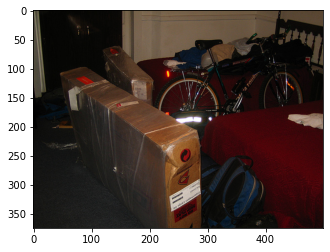

In [3]:
path = 'C:/Users/ArrunPersonal/Codes/ExDark/ExDark_Dataset'
os.chdir(path)

img = plt.imread('2015_00001.png')
plt.imshow(img)
plt.show()

In [8]:
annot_mat[1]

[['Bicycle', 136, 190, 215, 299],
 ['Bicycle', 219, 172, 282, 303],
 ['Bicycle', 277, 188, 353, 312],
 ['Bicycle', 348, 183, 405, 264],
 ['Car', 316, 171, 349, 197],
 ['Car', 395, 175, 429, 199]]

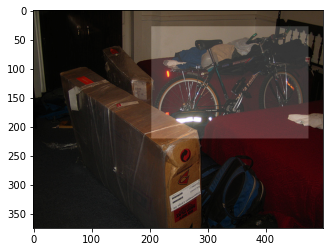

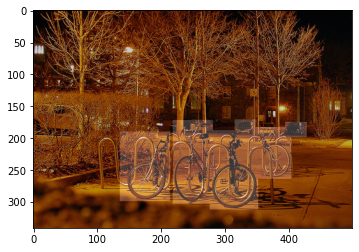

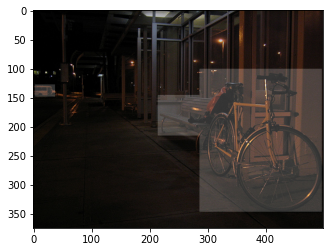

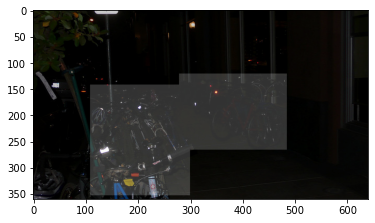

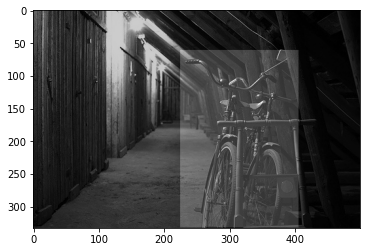

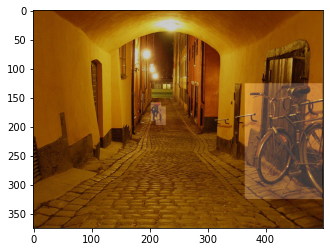

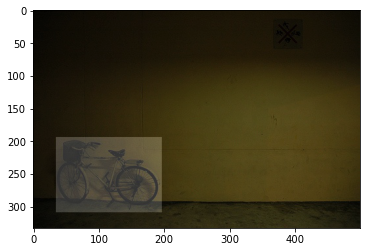

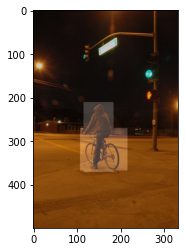

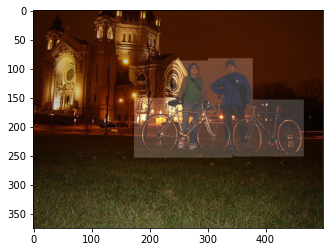

In [5]:
path = 'C:/Users/ArrunPersonal/Codes/ExDark/ExDark_Dataset'
os.chdir(path)

count = 0
while(count<9):
    img = plt.imread(f'2015_0000{count+1}.png')
    img_shape = np.shape(img)
    #temp = np.zeros((img_shape[0], img_shape[1], len(boxes[count])))
    plt.imshow(img)
    
    temp = np.zeros((img_shape[0],img_shape[1]))
    for j in range(len(annot_mat[count])):
        row_s, row_e = annot_mat[count][j][2], annot_mat[count][j][4]
        col_s, col_e = annot_mat[count][j][1], annot_mat[count][j][3]
        temp[row_s:row_e, col_s:col_e] = 1
    plt.imshow(temp, cmap='gray', alpha=0.2)
    plt.show()
    
    count += 1